### Getting Dataset Ready for Model Building

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [3]:
# Make a copy of original data frame
bankPromoModel_hsng_Df = bankPromo_df.copy()
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng_Df['housing']

# List final variables of the new dataset
bankPromoModel_hsng_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
Target        45211 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


#### Get list of categorical variables , keeping 'housing' as target/response variable

In [4]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('housing')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


#### Load Test Dataset

In [5]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_h_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_h_df = bankPromoAdditional_h_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['Target'].astype(np.int)
# Delete the original 'housing' column
del bankPromoAdditional_h_df['housing']

bankPromoAdditional_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
Target        4521 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 582.9+ KB


#####  Delete any features that do not relate to the response variable in the business sense

BankPromo dataset contains 

i) bank client data like age, balance, education, job , marital status , any loans - housing/personal , if they have defaulted  

ii) information regarding last contact  in current campaign - contact type, day/month when last contacted, duration of last call 

iii) other attributes like number of times contacted during current campaign ,number of days since last contact, number of contacts made in last campaign, outcome from previous campaign , outcome from current campagin i.e. Subscribed or not  


From business use case perspective, any information regarding Term deposit subscription campaign may have no effect on the client data but vice-versa may not be true. It will be interesting to find what features from the campaign information should be considered to predict if a customer has a housing loan or not

#### Perform One Hot Encoding for categorical variables in dataset

In [6]:
## Training Dataset
###################
# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng_Df = pd.concat((bankPromoModel_hsng_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng_Df.drop(categoricalVars, inplace=True, axis=1)
print("Training dataset info")
print("=====================")
bankPromoModel_hsng_Df.info()


## Test Dataset
###################
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_h_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_h_df = pd.concat((bankPromoAdditional_h_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_h_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_h_df:
    y_Final = bankPromoAdditional_h_df['Target'].values # get the labels we want
    del bankPromoAdditional_h_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_h_df.values

print("Test dataset info")
print("=====================")
bankPromoAdditional_h_df.info()

Training dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-

#### Create 10 Splits  Cross Validation Object

In [7]:
# Training and Test Split
# Since housing is a balanced dataset ( with 56% yes and 44% No , we will use simple KFold and ShuffleSplit cv objects)
from sklearn.model_selection import KFold
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

if 'Target' in bankPromoModel_hsng_Df:
    y = bankPromoModel_hsng_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng_Df['Target']        # get rid of the class label
    X = bankPromoModel_hsng_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
kfold_cv_object = KFold(n_splits=num_cv_iterations , shuffle = False , random_state=999)
#n_splits=num_cv_iterations,test_size  = 0.2, random_state=999
                         
print(kfold_cv_object)


KFold(n_splits=10, random_state=999, shuffle=False)


In [8]:
from sklearn.model_selection import ShuffleSplit
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
shuffle_cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size = 0.1, random_state=999)
                         
print(shuffle_cv_object)


ShuffleSplit(n_splits=10, random_state=999, test_size=0.1, train_size=None)


### Create Model

#### Simple Logistic Model Fit

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold))
display(pd.DataFrame(scores_kfold).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle = cross_validate(logisticModel , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle))
display(pd.DataFrame(scores_shuffle).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,2.043045,0.114479,0.944613,0.744731,0.574598,0.816525,0.895179,0.735653,0.897026,0.745085,0.997532,0.744378
1,1.879607,0.109446,0.853853,0.751690,0.585186,0.824778,0.752931,0.745441,0.908155,0.759814,0.805679,0.743738
2,1.886063,0.085486,0.500095,0.809572,0.627757,0.842206,0.418491,0.771369,0.343252,0.786251,0.920868,0.834318
3,2.041555,0.093085,0.088985,0.800586,0.538851,0.849564,0.438399,0.779258,0.553571,0.802225,0.048381,0.798954
4,1.826891,0.100516,0.245696,0.792306,0.669041,0.821918,0.786773,0.748169,0.581481,0.775134,0.155754,0.810256
5,1.825351,0.095947,0.590136,0.786064,0.761794,0.834171,0.685689,0.757483,0.719409,0.786815,0.500244,0.785315
6,1.992232,0.097947,0.455639,0.792442,0.696512,0.838221,0.629507,0.761637,0.705231,0.781817,0.336534,0.803358
7,3.823812,0.080319,0.878076,0.754189,0.772711,0.822239,0.807122,0.742910,0.891286,0.762158,0.865252,0.746384
8,1.818219,0.082956,0.900643,0.760999,0.843792,0.821425,0.846273,0.741927,0.857376,0.755513,0.948509,0.766564
9,2.037698,0.077663,0.377330,0.800729,0.646786,0.829804,0.630613,0.758270,0.292317,0.784798,0.532072,0.817321


fit_time           2.117447
score_time         0.093784
test_F1_Score      0.583507
train_F1_Score     0.779331
test_AUC           0.671703
train_AUC          0.830085
test_Accuracy      0.689098
train_Accuracy     0.754212
test_Precision     0.674911
train_Precision    0.773961
test_Recall        0.611083
train_Recall       0.785059
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:00:11.708129




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,2.184534,0.077950,0.775268,0.778855,0.827496,0.829789,0.749226,0.752316,0.772817,0.773054,0.777734,0.784745
1,2.150011,0.124972,0.788132,0.777900,0.835867,0.828970,0.764706,0.750940,0.783452,0.771810,0.792869,0.784086
2,2.131026,0.095480,0.781732,0.778234,0.838677,0.828603,0.755860,0.751505,0.779882,0.771818,0.783591,0.784757
3,2.261994,0.120514,0.782011,0.778980,0.833092,0.829253,0.754533,0.751923,0.767836,0.772082,0.796719,0.786002
4,2.388806,0.178146,0.787298,0.777778,0.838794,0.828522,0.764485,0.750399,0.781833,0.770795,0.792840,0.784888
5,2.307807,0.125958,0.782333,0.777182,0.831703,0.829384,0.756966,0.750694,0.785601,0.771488,0.779093,0.782961
6,2.366782,0.121443,0.774514,0.778807,0.824350,0.830311,0.748784,0.751702,0.763302,0.772398,0.786060,0.785323
7,2.418973,0.108017,0.784175,0.778494,0.830247,0.829594,0.756303,0.751628,0.776270,0.771426,0.792244,0.785692
8,1.478042,0.075487,0.768526,0.779463,0.823310,0.830286,0.743034,0.752759,0.761247,0.773899,0.775945,0.785109
9,1.466558,0.056030,0.771485,0.779363,0.821751,0.830527,0.744803,0.752587,0.762128,0.773346,0.781075,0.785474


fit_time           2.115453
score_time         0.108400
test_F1_Score      0.779547
train_F1_Score     0.778506
test_AUC           0.830529
train_AUC          0.829524
test_Accuracy      0.753870
train_Accuracy     0.751645
test_Precision     0.773437
train_Precision    0.772212
test_Recall        0.785817
train_Recall       0.784904
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:00:07.977410



#### Running poylnomial

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel2 = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold2 = cross_validate(logisticModel2 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold2))
display(pd.DataFrame(scores_kfold2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle2 = cross_validate(logisticModel2 , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle2))
display(pd.DataFrame(scores_shuffle2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,696.325340,2.765477,0.945170,0.785199,0.601824,0.855696,0.896064,0.776721,0.896239,0.782627,0.999753,0.787788
1,565.157112,2.596520,0.819712,0.787748,0.592195,0.860283,0.706260,0.781666,0.910434,0.793512,0.745432,0.782068
2,646.139728,2.634551,0.496214,0.832336,0.632943,0.871197,0.440832,0.800909,0.346797,0.816900,0.871849,0.848367
3,601.435450,2.529556,0.464406,0.822294,0.631675,0.875659,0.542358,0.802925,0.690000,0.822458,0.349980,0.822130
4,546.226694,2.693989,0.348553,0.825839,0.676370,0.860427,0.775935,0.788105,0.495430,0.805310,0.268849,0.847442
5,643.732224,2.031840,0.622435,0.820816,0.759851,0.869019,0.686574,0.795134,0.683841,0.814652,0.571149,0.827074
6,611.188166,2.688979,0.534449,0.825147,0.666164,0.871099,0.630834,0.798353,0.637816,0.810788,0.459914,0.840023
7,688.180470,1.603086,0.839953,0.791889,0.771620,0.857495,0.759345,0.779037,0.900915,0.788222,0.786718,0.795591
8,471.425449,1.358225,0.884973,0.797228,0.830222,0.858635,0.819509,0.780708,0.831964,0.790278,0.945197,0.804301
9,423.629601,0.783531,0.368894,0.828717,0.622348,0.863413,0.642778,0.792848,0.293532,0.814597,0.496320,0.843335


fit_time           589.344023
score_time           2.168575
test_F1_Score        0.632476
train_F1_Score       0.811721
test_AUC             0.678521
train_AUC            0.864292
test_Accuracy        0.690049
train_Accuracy       0.789641
test_Precision       0.668697
train_Precision      0.803934
test_Recall          0.649516
train_Recall         0.819812
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:29:05.146339




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,599.361578,2.512565,0.800315,0.812515,0.851785,0.864261,0.775763,0.788960,0.792821,0.802510,0.807952,0.822772
1,613.813326,2.223731,0.808485,0.811089,0.859143,0.863162,0.786378,0.786969,0.800235,0.800344,0.816907,0.822126
2,719.080238,2.477588,0.811765,0.810918,0.862007,0.862917,0.787705,0.787363,0.803260,0.801391,0.820452,0.820675
3,631.250372,2.141786,0.810588,0.812057,0.855950,0.863685,0.786378,0.788075,0.794694,0.801247,0.827131,0.823163
4,410.447711,2.488578,0.811047,0.811267,0.863257,0.862834,0.789695,0.787240,0.801335,0.801119,0.820998,0.821675
5,639.324061,2.574531,0.801990,0.810330,0.851309,0.864012,0.779965,0.786650,0.809237,0.800207,0.794872,0.820713
6,685.550675,2.823392,0.804493,0.812186,0.849843,0.864287,0.780628,0.788493,0.787423,0.802969,0.822321,0.821618
7,706.072124,2.130784,0.795762,0.812512,0.848338,0.864507,0.769792,0.788911,0.789105,0.801922,0.802533,0.823386
8,554.663549,1.456168,0.799127,0.812253,0.846864,0.864569,0.776205,0.788665,0.788793,0.803256,0.809735,0.821454
9,413.419742,0.938464,0.798974,0.813192,0.846567,0.864553,0.774657,0.789378,0.786408,0.802625,0.811949,0.824041


fit_time           597.298337
score_time           2.176759
test_F1_Score        0.804255
train_F1_Score       0.811832
test_AUC             0.853506
train_AUC            0.863879
test_Accuracy        0.780716
train_Accuracy       0.788070
test_Precision       0.795331
train_Precision      0.801759
test_Recall          0.813485
train_Recall         0.822162
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:28:53.219431



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## polynomial of degree 3

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel3 = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold3 = cross_validate(logisticModel3 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold3))
display(pd.DataFrame(scores_kfold3).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()


#### Fir the Model

In [10]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_hsng = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,\
                                                                   class_weight=None, random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel_hsng.fit(X,y) 


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=999, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

#### Interpret Feature Importance

month_aug has weight of -0.8218055880934713
month_jun has weight of -0.5133078366224679
age has weight of -0.34770575197344655
month_jul has weight of -0.33219653576913705
month_feb has weight of -0.30401987123143503
job_student has weight of -0.2298849457383366
month_jan has weight of -0.22251032200338852
month_sep has weight of -0.21537644820959612
month_oct has weight of -0.21508786998788285
Subscribed_yes has weight of -0.21214732837628966
marital_single has weight of -0.20485834964766605
job_retired has weight of -0.20184179660375864
job_unknown has weight of -0.17482566966737745
month_mar has weight of -0.16929127133360752
month_nov has weight of -0.1548033384929472
month_dec has weight of -0.13777989156208167
poutcome_success has weight of -0.12940030098315464
day has weight of -0.11748156842113988
job_housemaid has weight of -0.10266310732500522
job_unemployed has weight of -0.0914933371853685
contact_telephone has weight of -0.06990775131880754
education_unknown has weight of 

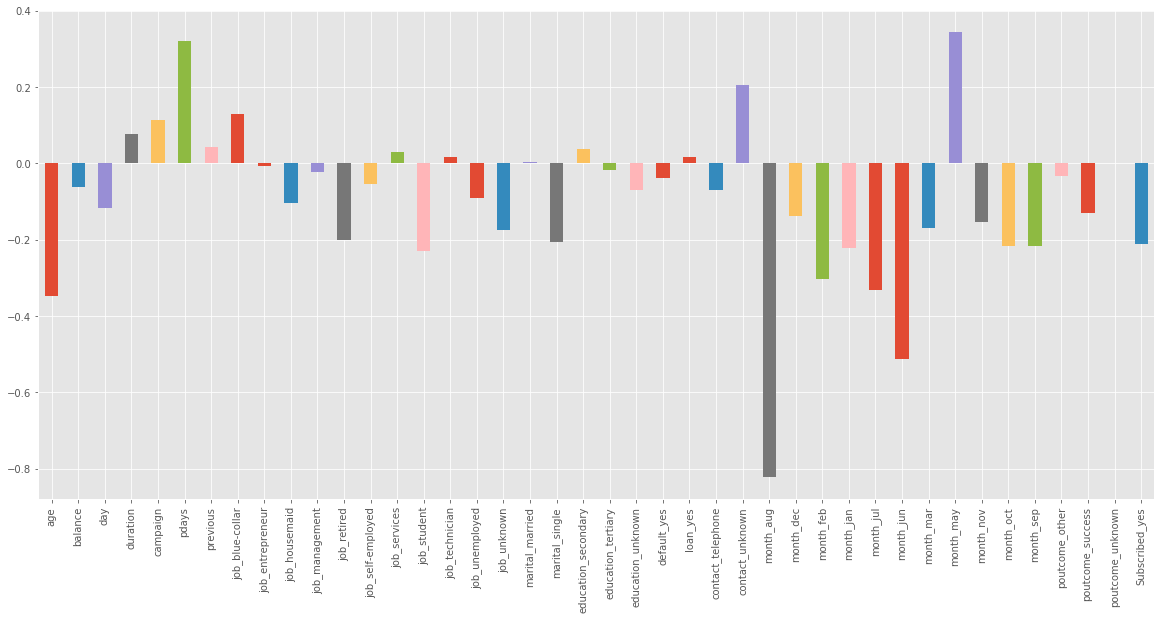

In [11]:
classifier_model = logisticModel_hsng.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_hsng_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_hsng_Df.columns)
weights.plot(kind='bar')
plt.show()

### Tuning The Model Hyper Paramters Using Grid Search

In [14]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 75.43120063354607, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} with a score of 0.69


In [15]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = shuffle_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 0.0020235896477251557, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'} with a score of 0.75


### Feature selection based on pearson coeff and Chi-Sq2 tests and top 18 imp features

In [35]:
# create dataframes on selected features
## based on 2 methods 18 features
bankPromoModel_hsng218_Df = bankPromo_df.copy()
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng218_Df['housing']
del bankPromoModel_hsng218_Df['default']
del bankPromoModel_hsng218_Df['previous']
del bankPromoModel_hsng218_Df['marital']
del bankPromoModel_hsng218_Df['duration']
del bankPromoModel_hsng218_Df['day']
del bankPromoModel_hsng218_Df['campaign']
del bankPromoModel_hsng218_Df['balance']


# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars218 = list()
# List to hold names of numerical variables
numericalVars218 = list()

for colName in bankPromoModel_hsng218_Df.columns:
    if bankPromoModel_hsng218_Df[colName].dtype == np.int64:
        numericalVars218.append(colName)
    elif bankPromoModel_hsng218_Df[colName].dtype == np.object:
        categoricalVars218.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
#categoricalVars618.remove('Target')

print(numericalVars218)
print(categoricalVars218)

# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars218:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng218_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng218_Df = pd.concat((bankPromoModel_hsng218_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng218_Df.drop(categoricalVars218, inplace=True, axis=1)
bankPromoModel_hsng218_Df.info()

['age', 'pdays']
['job', 'education', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                    45211 non-null int64
pdays                  45211 non-null int64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
loan_yes               45211 non-null uint8
contact

#### Create 10 Splits Stratified Cross Validation Object

In [36]:
# Training and Test Split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

if 'Target' in bankPromoModel_hsng218_Df:
    y218 = bankPromoModel_hsng218_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng218_Df['Target']        # get rid of the class label
    X218 = bankPromoModel_hsng218_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold218 = cross_validate(logisticModel , X218, y=y218 , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold218))
display(pd.DataFrame(scores_kfold218).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle218 = cross_validate(logisticModel , X218, y=y218 , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle218))
display(pd.DataFrame(scores_shuffle218).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.550702,0.085951,0.944477,0.739109,0.578961,0.810300,0.894958,0.729042,0.897180,0.737312,0.997038,0.740915
1,1.441770,0.096944,0.842384,0.745253,0.595578,0.819401,0.736784,0.738216,0.908571,0.751471,0.785185,0.739137
2,1.300789,0.088983,0.489116,0.805937,0.617726,0.837935,0.403008,0.765421,0.335149,0.777773,0.904762,0.836216
3,1.440767,0.099941,0.075350,0.793940,0.513998,0.845366,0.429993,0.772352,0.468750,0.797150,0.040968,0.790756
4,1.331774,0.088950,0.268366,0.787144,0.664718,0.815946,0.784119,0.741214,0.549080,0.768108,0.177579,0.807147
5,1.199850,0.074965,0.584096,0.781361,0.764440,0.828571,0.678390,0.751389,0.703653,0.779709,0.499267,0.783019
6,1.121871,0.094946,0.409184,0.788911,0.691436,0.833053,0.618668,0.756550,0.714970,0.775135,0.286606,0.803185
7,2.972302,0.048973,0.888950,0.749460,0.773183,0.816797,0.820173,0.737626,0.881365,0.756383,0.896666,0.742663
8,1.020419,0.064963,0.897564,0.756787,0.833758,0.816321,0.840964,0.736471,0.851812,0.748788,0.948509,0.764959
9,1.177328,0.067977,0.370974,0.795416,0.644534,0.824746,0.624198,0.751241,0.286286,0.777839,0.526814,0.813805


fit_time           1.455757
score_time         0.081259
test_F1_Score      0.577046
train_F1_Score     0.774332
test_AUC           0.667833
train_AUC          0.824844
test_Accuracy      0.683126
train_Accuracy     0.747952
test_Precision     0.659682
train_Precision    0.766967
test_Recall        0.606339
train_Recall       0.782180
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:00:10.290283




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.683035,0.091948,0.774892,0.773085,0.822790,0.824528,0.747015,0.745140,0.767043,0.765216,0.782903,0.781119
1,1.558111,0.100942,0.775144,0.773766,0.829510,0.823909,0.750332,0.745582,0.770693,0.765568,0.779647,0.782142
2,1.660052,0.107941,0.779394,0.773131,0.834068,0.823295,0.751880,0.745091,0.773313,0.764701,0.785573,0.781749
3,1.748003,0.176416,0.777734,0.773685,0.827675,0.824061,0.750111,0.745263,0.764797,0.764719,0.791116,0.782864
4,1.606099,0.103942,0.778264,0.773096,0.832877,0.823397,0.753649,0.744550,0.770292,0.764419,0.786404,0.781973
5,1.491657,0.107939,0.775050,0.773234,0.824467,0.824407,0.748784,0.745312,0.778131,0.764716,0.771992,0.781943
6,1.512645,0.086950,0.772781,0.773454,0.819409,0.825066,0.745245,0.745042,0.756955,0.765166,0.789283,0.781923
7,1.498651,0.079954,0.773307,0.774222,0.824163,0.824513,0.744582,0.746000,0.767134,0.764716,0.779581,0.783967
8,0.853510,0.049978,0.766169,0.774012,0.819647,0.824888,0.740159,0.746025,0.758173,0.766635,0.774336,0.781532
9,0.822529,0.046974,0.767156,0.774154,0.816886,0.825277,0.740380,0.745902,0.759027,0.765674,0.775461,0.782824


fit_time           1.443429
score_time         0.095298
test_F1_Score      0.773989
train_F1_Score     0.773584
test_AUC           0.825149
train_AUC          0.824334
test_Accuracy      0.747214
train_Accuracy     0.745391
test_Precision     0.766556
train_Precision    0.765153
test_Recall        0.781630
train_Recall       0.782204
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:00:05.943616

